# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

## 1. Download the dataset [1 point]

In [3]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"

## 2. Load the dataset [1 point]

In [4]:
data = pd.read_csv(url, encoding='latin1')
print(data)

       neutral  \
0      neutral   
1     negative   
2     positive   
3     positive   
4     positive   
...        ...   
4840  negative   
4841   neutral   
4842  negative   
4843  negative   
4844  negative   

     According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0     Technopolis plans to develop in stages an area...                                                                               
1     The international electronic industry company ...                                                                               
2     With the new production plant the company woul...                                                                               
3     According to the company 's updated strategy f...                                                                               
4     FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                     

## 3. Explore the dataset [10 points]

In [5]:
print(data.head())

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [7]:
print(data.describe())

        neutral  \
count      4845   
unique        3   
top     neutral   
freq       2878   

       According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
count                                                4845                                                                               
unique                                               4837                                                                               
top     TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...                                                                               
freq                                                    2                                                                               


## 4. Clean the data [5 points]

In [8]:
data.columns = ['sentiment', 'headline']
print(data.head())

  sentiment                                           headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [9]:
data.drop_duplicates(inplace=True)
print(data.describe())
print(data['sentiment'].value_counts())

       sentiment                                           headline
count       4839                                               4839
unique         3                                               4837
top      neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq        2872                                                  2
sentiment
neutral     2872
positive    1363
negative     604
Name: count, dtype: int64


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [10]:
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train.values.reshape(-1, 1), y_train)

## 6. BoW model [15 points]

In [13]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['headline'])

## 7. Tf-idf model [15 points]

In [14]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['headline'])

## 8. Split train test data [3 points]

In [15]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, data['sentiment'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [16]:
# Using Random forest algorithm and BOW
classifier_rb = RandomForestClassifier()
classifier_rb.fit(X_train_bow, y_train)
predictions_rb = classifier_rb.predict(X_test_bow)

In [17]:
# Using Random forest algorithm and TFIDF
classifier_rb_tfidf = RandomForestClassifier()
classifier_rb_tfidf.fit(X_train_bow, y_train)
predictions_rb_tfidf = classifier_rb_tfidf.predict(X_test_tfidf)

## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [18]:
# Using Naive Bayes Classifier and TFIDF
classifier_nb_tfidf = MultinomialNB()
classifier_nb_tfidf.fit(X_train_bow, y_train)
predictions_nb_tfidf = classifier_nb_tfidf.predict(X_test_tfidf)

In [19]:
# Naive Bayes Classifier and BOW
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_tfidf, y_train)
predictions_nb = classifier_nb.predict(X_test_bow)

In [20]:
# Random Forest - Performance - BOW
print("Accuracy for RF and BOW:", accuracy_score(y_test, predictions_rb))
print("Analysis for for RFand BOW :\n", classification_report(y_test, predictions_rb))
# Random Forest - Performance - TFIDF
print("Accuracy for RF and TFIDF :", accuracy_score(y_test, predictions_rb_tfidf))
print("Analysis for for RF and TFIDF:\n", classification_report(y_test, predictions_rb_tfidf))

Accuracy for RF and BOW: 0.7417355371900827
Analysis for for RFand BOW :
               precision    recall  f1-score   support

    negative       0.85      0.38      0.53       120
     neutral       0.72      0.98      0.83       571
    positive       0.80      0.41      0.54       277

    accuracy                           0.74       968
   macro avg       0.79      0.59      0.63       968
weighted avg       0.76      0.74      0.71       968

Accuracy for RF and TFIDF : 0.5909090909090909
Analysis for for RF and TFIDF:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       120
     neutral       0.59      1.00      0.74       571
    positive       1.00      0.00      0.01       277

    accuracy                           0.59       968
   macro avg       0.53      0.33      0.25       968
weighted avg       0.63      0.59      0.44       968


C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [21]:
# Naive Bayes  - Performance - TFIDF
print("Accuracy for Naive bayes - TFIDF:", accuracy_score(y_test, predictions_nb_tfidf))
print("Analysis for Naive bayes - TFIDF:\n", classification_report(y_test, predictions_nb_tfidf))
# Naive Bayes  - Performance - BOW
print("Accuracy for Naive bayes-BOW:", accuracy_score(y_test, predictions_nb))
print("Analysis for Naive bayes-BOW:\n", classification_report(y_test, predictions_nb))

Accuracy for Naive bayes - TFIDF: 0.7035123966942148
Analysis for Naive bayes - TFIDF:
               precision    recall  f1-score   support

    negative       0.86      0.36      0.51       120
     neutral       0.72      0.89      0.80       571
    positive       0.60      0.46      0.52       277

    accuracy                           0.70       968
   macro avg       0.73      0.57      0.61       968
weighted avg       0.70      0.70      0.68       968

Accuracy for Naive bayes-BOW: 0.6683884297520661
Analysis for Naive bayes-BOW:
               precision    recall  f1-score   support

    negative       1.00      0.05      0.10       120
     neutral       0.68      0.97      0.80       571
    positive       0.58      0.31      0.41       277

    accuracy                           0.67       968
   macro avg       0.76      0.44      0.43       968
weighted avg       0.69      0.67      0.60       968


## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

In [22]:
def confusion_matrix_analysis(y_true, y_pred, title):
    cmatrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

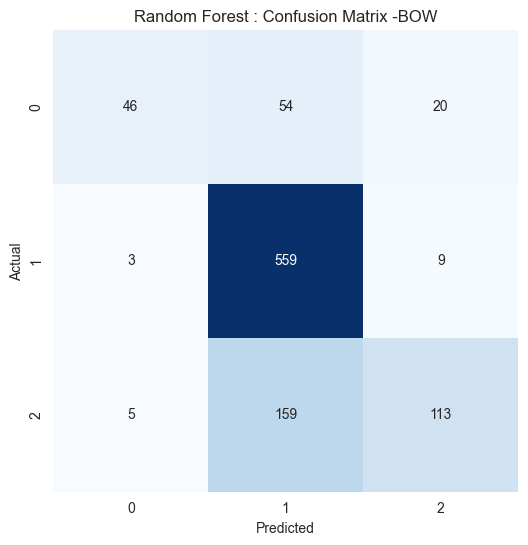

In [23]:
confusion_matrix_analysis(y_test, predictions_rb, "Random Forest : Confusion Matrix -BOW")

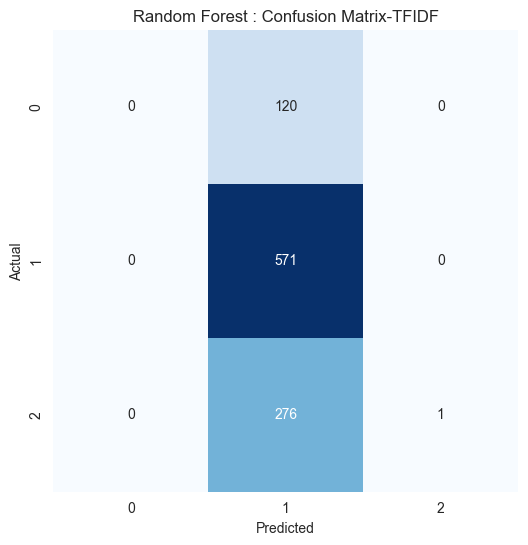

In [24]:
confusion_matrix_analysis(y_test, predictions_rb_tfidf, "Random Forest : Confusion Matrix-TFIDF")

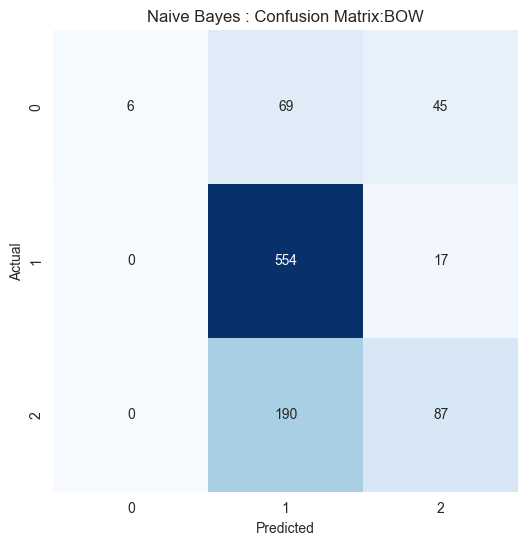

In [25]:
confusion_matrix_analysis(y_test, predictions_nb, "Naive Bayes : Confusion Matrix:BOW")

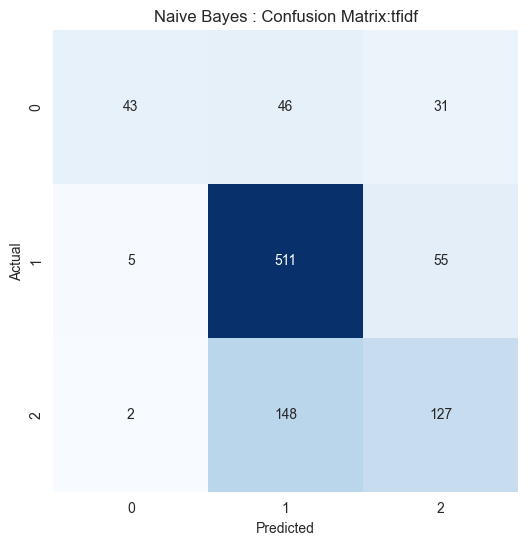

In [26]:
confusion_matrix_analysis(y_test, predictions_nb_tfidf, "Naive Bayes : Confusion Matrix:tfidf")